#**АИС. Лабораторная работа №3**

**Максимов Антон, 17ПМИ**

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from numpy import loadtxt
from scipy.optimize import linprog as simplex
from collections import deque
import random
import timeit

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
cd /content/gdrive/'My Drive'/АИО/qap_test/

In [0]:
def read_it(filename):
  with open(filename) as f:
    return [int(elem) for elem in f.read().split()]

In [0]:
a=!ls -1  *.*

In [0]:
a=!ls -1  *.*
a.append(a.pop(a.index('tai100a.txt')))
n =[]
matrix_distance = []
matrix_flows = []
for i in range(0,len(a)):
  data = iter(read_it(a[i]))
  tmp = next(data)
  n.append(tmp)
  A = [[next(data) for j in range(tmp)] for i in range(tmp)]
  B = [[next(data) for j in range(tmp)] for i in range(tmp)]
  matrix_distance.append(A)
  matrix_flows.append(B)

In [6]:
print(n[0])
print(matrix_distance[0])
print(matrix_flows[0])

20
[[0, 85, 72, 7, 49, 46, 87, 58, 17, 68, 27, 21, 6, 67, 26, 82, 44, 35, 3, 62], [85, 0, 8, 51, 1, 91, 39, 87, 72, 45, 96, 7, 87, 68, 33, 3, 21, 90, 45, 47], [72, 8, 0, 25, 30, 43, 97, 33, 35, 61, 42, 36, 43, 7, 84, 6, 0, 0, 48, 62], [7, 51, 25, 0, 59, 29, 94, 82, 29, 3, 3, 51, 67, 39, 15, 66, 42, 23, 62, 62], [49, 1, 30, 59, 0, 28, 76, 66, 82, 98, 35, 15, 17, 77, 44, 26, 76, 86, 60, 62], [46, 91, 43, 29, 28, 0, 62, 83, 91, 57, 62, 36, 2, 2, 43, 65, 37, 49, 61, 5], [87, 39, 97, 94, 76, 62, 0, 34, 53, 96, 82, 48, 28, 31, 75, 1, 95, 7, 92, 69], [58, 87, 33, 82, 66, 83, 34, 0, 62, 32, 97, 5, 39, 50, 82, 93, 71, 35, 14, 20], [17, 72, 35, 29, 82, 91, 53, 62, 0, 74, 49, 50, 37, 79, 19, 51, 70, 42, 26, 79], [68, 45, 61, 3, 98, 57, 96, 32, 74, 0, 98, 60, 35, 9, 96, 70, 21, 37, 37, 67], [27, 96, 42, 3, 35, 62, 82, 97, 49, 98, 0, 93, 93, 39, 2, 52, 26, 90, 26, 1], [21, 7, 36, 51, 15, 36, 48, 5, 50, 60, 93, 0, 68, 93, 7, 94, 19, 54, 37, 0], [6, 87, 43, 67, 17, 2, 28, 39, 37, 35, 93, 68, 0, 20, 1

##**Local search - first-improvement + don't look bits**

In [0]:
def function_value(solution, n, matrix_distance, matrix_flows):
  value=0
  for i in range(0, n):
    for j in range(0, n):
      value+=matrix_distance[i][j]*matrix_flows[solution[i]-1][solution[j]-1]
  return value

In [0]:
def LocalSearch(n, matrix_distance, matrix_flows, initial = None):
    
    if initial == None:
      best_solution = random.sample(list(range(1,n+1)),n)
    else:
      best_solution = initial  
    best_value = function_value(best_solution, n, matrix_distance, matrix_flows)

    dont_look_bits = [0]*n

    
        
    improvement = False  
    current_solution = best_solution
    i = 0
    j = 1
    dont_look_bits = [0]*n

    while i < n - 1:
          
      if dont_look_bits[i] == 1:
        continue
      
      new_solution = current_solution.copy()
      new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
      new_value = function_value(new_solution, n, matrix_distance, matrix_flows)
            

      if new_value < best_value:
          improvement = True
          current_solution = new_solution
          best_solution = new_solution
          best_value = new_value
              
      if j < n - 1:
        j = j + 1
      else:
        if improvement == False:
          dont_look_bits[i]=1
        i = i + 1
        j = i + 1 

    return best_value, best_solution

In [585]:
value, sol = LocalSearch(n[4],matrix_distance[4],matrix_flows[4])
print(value)

22239956


##**Iterated local search stochastic 2-opt**

In [0]:
def Perturbation(k, solution):
    choiced = random.sample(list(solution), k)
    pos = [solution.index(x) for x in choiced]
    random.shuffle(choiced)
    for i in range(len(pos)):
      solution[pos[i]] = choiced[i]
    return solution  

In [0]:
def LocalSearch_stochastic_2opt(n, matrix_distance, matrix_flows, max_no_improv, initial = None):
    if initial == None:
      best_solution = random.sample(list(range(1,n+1)),n)
    else:
      best_solution = initial  
    best_value = function_value(best_solution, n, matrix_distance, matrix_flows)

   
    while max_no_improv!=0:

      new_solution = best_solution
      new_solution = stochastic_2opt(new_solution)
      new_value = function_value(new_solution, n, matrix_distance, matrix_flows)
      if new_value < best_value:
          best_solution = new_solution
          best_value = new_value
      else:    
        max_no_improv-=1    
          
    return best_value, best_solution

In [589]:
value, sol = LocalSearch_stochastic_2opt(n[0],matrix_distance[0],matrix_flows[0], max_no_improv=n[0]*100)
print(value)

773702


In [0]:
print(*sol, sep = " ")

In [0]:
def stochastic_2opt(solution):
    i = solution.index(random.choice(solution))
    j = solution.index(random.choice(solution))
    solution = solution[:]
    if j < i:
        i, j = j, i
    rev = solution[i:j]
    rev.reverse()
    solution[i:j] = rev
    return solution

**Вариант stochastic 2-opt**

In [0]:
def Iterated_Local_Search_stochastic_2opt(n, matrix_distance, matrix_flows, k):
    s_value, s = LocalSearch(n, matrix_distance, matrix_flows)
    max_iter = 100
    iteration = 0

    while iteration < max_iter:
      new_s = Perturbation(k, s) 

      new_new_s_value, new_new_s = LocalSearch_stochastic_2opt(n, matrix_distance, matrix_flows, max_no_improv=50, initial = new_s)

      if new_new_s_value < s_value:
         s = new_new_s
         s_value = new_new_s_value

      iteration += 1
    return s_value, s  

**Вариант без stochastic 2-opt**

In [0]:
def Iterated_Local_Search(n, matrix_distance, matrix_flows, k):
    s_value, s = LocalSearch(n, matrix_distance, matrix_flows)
    max_iter = 100
    iteration = 0

    while iteration < max_iter:
      new_s = Perturbation(k, s) 

      new_new_s_value, new_new_s = LocalSearch(n, matrix_distance, matrix_flows, initial = new_s)

      if new_new_s_value < s_value:
         s = new_new_s
         s_value = new_new_s_value

      iteration += 1
    return s_value, s  

In [603]:
value, sol = Iterated_Local_Search(n[4],matrix_distance[4],matrix_flows[4], 2)
print(value)

21911932


In [604]:
print(*sol, sep = " ")

5 81 76 50 58 95 54 36 67 28 44 30 72 63 42 87 9 73 62 24 52 69 57 12 94 18 17 31 92 99 64 20 74 26 10 98 22 27 59 4 91 39 82 53 66 97 88 7 43 61 21 19 15 78 100 56 25 70 34 6 55 38 89 86 96 32 47 16 93 1 13 79 23 75 37 14 84 33 3 45 40 8 35 48 60 11 51 71 29 65 90 68 41 2 83 46 49 77 80 85


##**Guided local search**

In [0]:
def augmented_function_value(solution, n, matrix_distance, matrix_flows, penalties, lamb = None):
  value=0
  for i in range(0, n):
    for j in range(0, n):
      value+=matrix_distance[i][j]*matrix_flows[solution[i]-1][solution[j]-1]

      if solution[i] == j:
        value += lamb * penalties[i][j]
  return value

In [0]:
def update_penalty(utility, penalties):
    indices = (np.argwhere(np.amax(utility) == utility))
    for i in (indices):
        penalties[i[0]][i[1]] += 1
    return penalties

In [0]:
def calculate_feature_cost(city, fabric, solution, matrix_distance, matrix_flows):
    cost = 0
    for j in range(len(solution)):
        cost += matrix_flows[fabric][solution[j]-1] * matrix_distance[city][j]
        cost += matrix_flows[solution[j]-1][fabric] * matrix_distance[j][city]
    return cost

In [0]:
def calculate_utility(penalties, solution, n, matrix_distance, matrix_flows):
    utility = [[0] * n for i in range(n)]
    for i in range(n):
        for j in range(n):
            utility[i][j] = calculate_feature_cost(i, j, solution, matrix_distance, matrix_flows) / (1 + penalties[i][j])
    return utility

In [0]:
def LocalSearch_stochastic_2opt_augmented(n, matrix_distance, matrix_flows, penalties, max_no_improv, lamb, initial = None):
    if initial == None:
      best_solution = random.sample(list(range(1,n+1)),n)
    else:
      best_solution = initial  
    best_value = augmented_function_value(best_solution, n, matrix_distance, matrix_flows, penalties, lamb=lamb)

    improvement = False  
    while max_no_improv!=0 and not improvement:

      new_solution = best_solution
      new_solution = stochastic_2opt(new_solution)
      new_value = augmented_function_value(new_solution, n, matrix_distance, matrix_flows, penalties, lamb=lamb)
      if new_value < best_value:
          improvement = True
          best_solution = new_solution
          best_value = new_value
      else:    
        max_no_improv-=1    
          
    return  best_value, best_solution

In [0]:
def LocalSearch_augmented(n, matrix_distance, matrix_flows, penalties, initial = None, lamb = None):
    
    if initial == None:
      best_solution = random.sample(list(range(1,n+1)),n)
    else:
      best_solution = initial  
    best_value = augmented_function_value(best_solution, n, matrix_distance, matrix_flows , penalties, lamb=lamb)

    dont_look_bits = [0]*n

    
        
    improvement = False  
    current_solution = best_solution
    i = 0
    j = 1
    dont_look_bits = [0]*n

    while i < n - 1:
          
      if dont_look_bits[i] == 1:
        continue
      
      new_solution = current_solution.copy()
      new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
      #new_solution = stochastic_2opt(new_solution, i, j)
      new_value = augmented_function_value(new_solution, n, matrix_distance, matrix_flows, penalties, lamb=lamb)
            

      if new_value < best_value:
          improvement = True
          current_solution = new_solution
          best_solution = new_solution
          best_value = new_value
              
      if j < n - 1:
        j = j + 1
      else:
        if improvement == False:
          dont_look_bits[i]=1
        i = i + 1
        j = i + 1 

    return best_value, best_solution

In [0]:
def Guided_Local_Search(n, matrix_distance, matrix_flows, initial = None, lamb = None):
    iterations = 100
    penalties = [[0] * n for i in range(n)]
    current_solution = random.sample(list(range(1,n+1)),n)
    current_best_obj = augmented_function_value(current_solution, n, matrix_distance, matrix_flows, penalties, lamb = lamb)
    new_solution = current_solution.copy()
    for i in range(iterations):
       new_obj, new_solution  = LocalSearch_stochastic_2opt_augmented(n, matrix_distance, matrix_flows, penalties, max_no_improv = 50, initial = new_solution, lamb = lamb)
       
       current_obj = augmented_function_value(new_solution, n, matrix_distance, matrix_flows, penalties, lamb = lamb)
       if current_obj < current_best_obj:
          current_solution = new_solution.copy()
          current_best_obj = current_obj
       penalties = update_penalty(calculate_utility(penalties, new_solution, n, matrix_distance, matrix_flows), penalties)
    return current_best_obj, current_solution


In [0]:
value, sol = Guided_Local_Search(n[4],matrix_distance[4],matrix_flows[4], lamb = 10*n[4] )
print(value)

In [0]:
print(*sol, sep = " ")

##**Тестирование**

In [0]:
DLB = []
for test in range(0, 5):
  DLB.append(np.mean(timeit.repeat("LocalSearch(n[{0}],matrix_distance[{0}],matrix_flows[{0}])".format(test), setup="from __main__ import LocalSearch, n, matrix_distance, matrix_flows", repeat = 3, number = 1)))

In [0]:
IT = []
for test in range(0, 5):
  IT.append(np.mean(timeit.repeat("Iterated_Local_Search(n[{0}],matrix_distance[{0}],matrix_flows[{0}], 2)".format(test), setup="from __main__ import Iterated_Local_Search, n, matrix_distance, matrix_flows", repeat = 1, number = 1)))
  print(test)

In [0]:
GUI = []
for test in range(0, 5):
  GUI.append(np.mean(timeit.repeat("Guided_Local_Search(n[{0}],matrix_distance[{0}],matrix_flows[{0}], lamb = 10*n[{0}])".format(test), setup="from __main__ import Guided_Local_Search, n, matrix_distance, matrix_flows", repeat = 1, number = 1)))
  print(test)

**stochastic 2-opt`s**

In [0]:
ITS = []
for test in range(0, 5):
  ITS.append(np.mean(timeit.repeat("Iterated_Local_Search_stochastic_2opt(n[{0}],matrix_distance[{0}],matrix_flows[{0}], 2)".format(test), setup="from __main__ import Iterated_Local_Search_stochastic_2opt, n, matrix_distance, matrix_flows", repeat = 3, number = 1)))
  print(test)

In [0]:
GUIS = []
for test in range(0, 5):
  GUIS.append(np.mean(timeit.repeat("Guided_Local_Search(n[{0}],matrix_distance[{0}],matrix_flows[{0}], lamb = 10*n[{0}])".format(test), setup="from __main__ import Guided_Local_Search, n, matrix_distance, matrix_flows", repeat = 1, number = 1)))
  print(test)

**Общая таблица времени**

In [502]:
df = pd.DataFrame({
'Алгоритм': ['Local search - first-improvement + dont look bits', 'Iterated local search', 'Guided local search', 'Iterated_Local_Search + stochastic_2opt', 'Guided_Local_Search + stochastic_2opt'],
'tai20': [DLB[0], IT[0], GUI[0], ITS[0], GUIS[0] ],
'tai40': [DLB[1], IT[1], GUI[1], ITS[1], GUIS[1] ],
'tai60': [DLB[2], IT[2], GUI[2], ITS[2], GUIS[2] ],
'tai80': [DLB[3], IT[3], GUI[3], ITS[3], GUIS[3] ],
'tai100':[DLB[4], IT[4], GUI[4], ITS[4], GUIS[4] ],
'Среднее время по всему датасету': [np.mean(DLB), np.mean(IT),np.mean(GUI), np.mean(ITS), np.mean(GUIS) ]
})
df

,Алгоритм,tai20,tai40,tai60,tai80,tai100,Среднее время по всему датасету
0,Local search - first-improvement + dont look bits,0.016551,0.223666,1.095526,3.469039,8.430288,2.647014
1,Iterated local search,1.466423,22.418819,117.367879,351.136780,858.748227,270.227626
2,Guided local search,0.826647,11.466498,56.314548,171.515923,420.071361,132.038995
3,Iterated_Local_Search + stochastic_2opt,0.455428,1.853238,4.529976,9.380569,17.415399,6.726922
4,Guided_Local_Search + stochastic_2opt,0.707960,3.364136,9.579450,20.842235,38.855494,14.669855


**В Iterated local search и Guided local search использовался dont look bits, так что это не полный перебор)**

In [0]:
cd /content/gdrive/'My Drive'/АИО/

**Средние результаты целевых функций**

In [645]:
df = pd.DataFrame({
'Алгоритм': ['Local search - first-improvement + dont look bits', 'Iterated_Local_Search + stochastic_2opt', 'Guided_Local_Search + stochastic_2opt'],
'tai20': [int(DLB[0]/3), int(ITS[0]/3), int(GUIS[0]/3) ],
'tai40': [int(DLB[1]/3), int(ITS[1]/3), int(GUIS[1]/3) ],
'tai60': [int(DLB[2]/3), int(ITS[2]/3), int(GUIS[2]/3) ],
'tai80': [int(DLB[3]/3), int(ITS[3]/3), int(GUIS[3]/3) ],
'tai100':[int(DLB[4]/3), int(ITS[4]/3), int(GUIS[4]/3) ]
})
df

,Алгоритм,tai20,tai40,tai60,tai80,tai100
0,Local search - first-improvement + dont look bits,764578,3384510,7672582,14323522,22164480
1,Iterated_Local_Search + stochastic_2opt,766355,3384307,7726640,14337227,22179116
2,Guided_Local_Search + stochastic_2opt,789834,3444679,7915857,14822294,23029070


**для не stochastic 2-opts не успел - дедлайн:D**

LocalSearch

In [0]:
DLB = [0]*5
for i in range(0,3):
  for test in range(0,5):
   best_value, best_solution = LocalSearch(n[test],matrix_distance[test],matrix_flows[test])
   DLB[test] += best_value

In [0]:
DLB

Iterated

In [0]:
ITS = [0]*5
for i in range(0,3):
  for test in range(0,5):
   best_value, best_solution = Iterated_Local_Search_stochastic_2opt(n[test],matrix_distance[test],matrix_flows[test], 2)
   ITS[test] += best_value

Guided

In [0]:
GUIS = [0]*5
for i in range(0,3):
  for test in range(0,5):
   best_value, best_solution = Guided_Local_Search(n[test],matrix_distance[test],matrix_flows[test], lamb = 10*n[test] )
   GUIS[test] += best_value

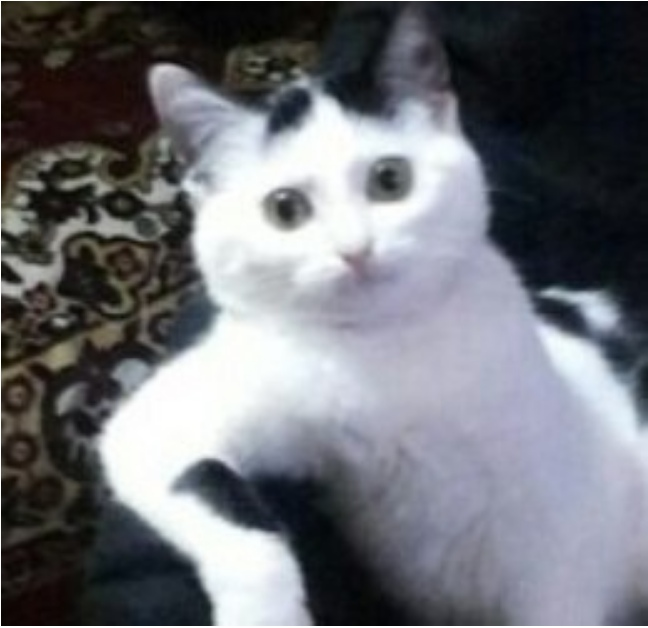